# Лабораторная работа 1
## Акулич Кирилл

# Метод среднего квадрата квадрата

In [6]:
import time
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

DIGIT_COUNT = 8

def get_middle_interval(number:int,interval_length:int)->int:
    number_str:str = str(number)
    number_len:int = len(number_str)
    middle_index= number_len//2
    interval_start = number_str[middle_index - interval_length//2: middle_index]
    interval_end = number_str[middle_index: middle_index +interval_length//2+ interval_length % 2]
    return int(interval_start + interval_end)

def get_value_to_devide():
    return 10**DIGIT_COUNT

def middle_square_generator(seed:int)->int:
    interval_length:int = len(str(seed))
    previous_value= seed
    value_to_devide = get_value_to_devide()
    while True:
        next_value = get_middle_interval(previous_value**2,interval_length)
        yield next_value * 1.0 / value_to_devide
        previous_value = next_value

В качестве начального значения выбираются последние 8 цифр текущего времени

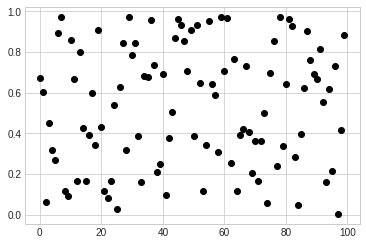

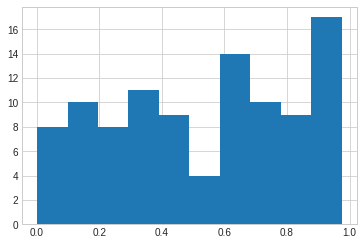

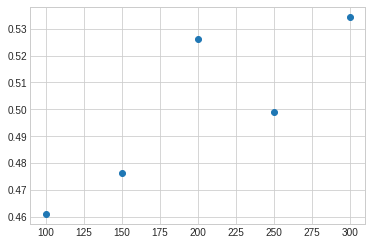

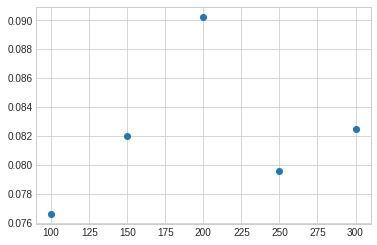

In [7]:
def get_seed():
    seed_str = str(time.time()).replace('.','')[-DIGIT_COUNT:]
    seed = int(seed_str)
    return seed

ms_seed = get_seed()
ms_seq_len = 100

ms_generator = middle_square_generator(ms_seed)
ms_values = [next(ms_generator) for _  in range(ms_seq_len)]

plt.plot(range(ms_seq_len),ms_values, 'o', color='black')
plt.show()

plt.hist(ms_values)
plt.show()


means = list()
std_s = list()
lens = list()
for i in range(5):
    ms_seed = get_seed()
    ms_generator = middle_square_generator(ms_seed)
    ms_values = [next(ms_generator) for _  in range(ms_seq_len)]
    means.append(np.mean(ms_values))
    std_s.append(np.std(ms_values))
    lens.append(ms_seq_len)
    ms_seq_len+=50

plt.plot(lens,means,'o')
plt.show()
plt.plot(lens,list(map(lambda x : x**2,std_s)),'o')

plt.show()

Выполним проверки последовательности на независимость и соответсвие равномерному распредению

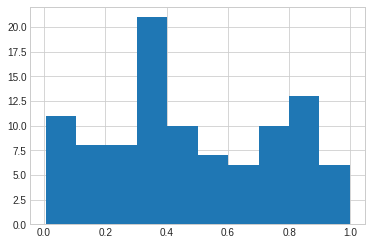

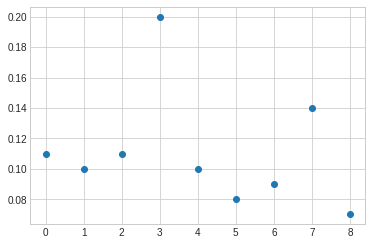

Ksi criteria:0.20859171678034527
K test:1.080123185410566e-06


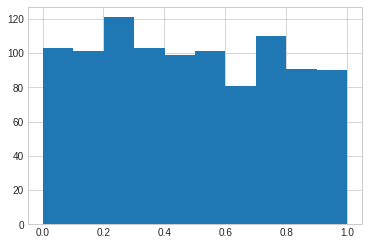

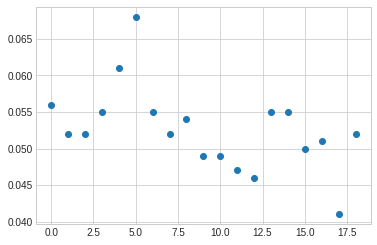

Ksi criteria:0.8848776680124656
K test:1.3143146153928677e-22


In [14]:
import ksi_suqare_criterea
import scipy.stats as sps

ms_seed = get_seed()
ms_seq_len = 100

ms_generator = middle_square_generator(ms_seed)
ms_values = [next(ms_generator) for _  in range(ms_seq_len)]

plt.hist(ms_values)
plt.show()
freq,interval=ksi_suqare_criterea.ksi_criteria(ms_values,0,1,10)

plt.plot(range(len(freq)),freq,'o')
plt.show()

print("Ksi criteria:"+str(sps.chisquare([f* ms_seq_len for f in freq]).pvalue))
print("K test:" + str(sps.kstest(freq,'uniform').pvalue))


ms_seed = get_seed()
ms_seq_len = 1000

ms_generator = middle_square_generator(ms_seed)
ms_values = [next(ms_generator) for _  in range(ms_seq_len)]

plt.hist(ms_values)
plt.show()

freq,interval=ksi_suqare_criterea.ksi_criteria(ms_values,0,1,20)

plt.plot(range(len(freq)),freq,'o')
plt.show()

print("Ksi criteria:"+str(sps.chisquare([f* ms_seq_len for f in freq]).pvalue))
print("K test:" + str(sps.kstest(freq,'uniform').pvalue))






Проверим распределние на независимость

[0.007533856651085483, -0.05515865148245441, -0.01881002454488813, nan, 0.0038092476385340837]


/home/kirill/.local/lib/python3.8/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


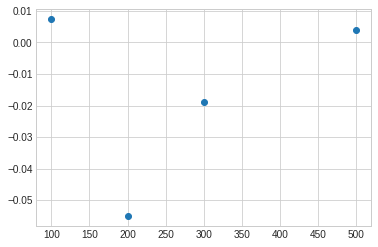

In [15]:
import scipy 
correlation_coeffs = list()
lens = list()
step = 10
ms_seq_len= 100
for i in range(5):
    ms_seed = get_seed()
    ms_generator = middle_square_generator(ms_seed)
    ms_values = [next(ms_generator) for _  in range(ms_seq_len)]
    x = ms_values[:(-step)]
    y =ms_values[step:]
    correlation_coeffs.append(scipy.stats.pearsonr(x, y)[0])
    lens.append(ms_seq_len)
    ms_seq_len +=100

print(correlation_coeffs)
plt.plot(lens,correlation_coeffs,'o')
plt.show()


Если т = 10е, е > 5, с = 0 и Хо не кратно 2 или 5, то период
линейной конгруэнтной последовательности равен 5 х 10е2 тогда и только тогда,
когда a mod 200 равно одному из следующих 32 чисел:
3, 11, 13, 19, 21, 27, 29, 37, 53, 59, 61, 67, 69, 77, 83, 91, 109, 117, . .
123, 131, 133, 139, 141, 147, 163, 171, 173, 179, 181, 187, 189, 197.

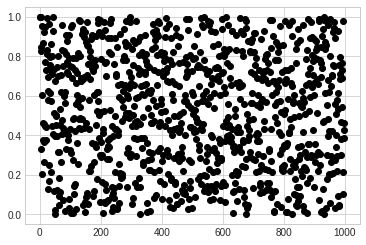

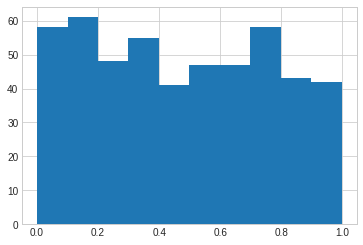

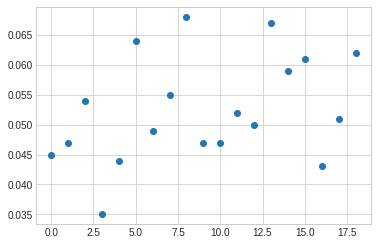

[0.045, 0.047, 0.054, 0.035, 0.044, 0.064, 0.049, 0.055, 0.068, 0.047, 0.047, 0.052, 0.05, 0.067, 0.059, 0.061, 0.043, 0.051, 0.062]
Ksi criteria:1.0
K test:1.3143146153928677e-22


In [16]:
import math

def congruent_method_generator(a,m,x0):
    x= x0
    while True:
        x = a*x%m
        yield x * 1.0 / m


def get_x0(m):
    for i in range(m-1,1,-1):
        if math.gcd(i,m) == 1:
            return i
    return 1

m =10**10
x0=get_x0(m)
a=197

mk_seq_len = 1000
gen = congruent_method_generator(a,m,x0)
mk_values = list()
for i in range(mk_seq_len):
    mk_values.append(next(gen))


plt.plot(range(mk_seq_len),mk_values, 'o', color='black')
plt.show()

freq,interval=ksi_suqare_criterea.ksi_criteria(mk_values,0,1,20)
plt.hist(ms_values)
plt.show()

plt.plot(range(len(freq)),freq,'o')
plt.show()
print(freq)
print("Ksi criteria:"+str(sps.chisquare([f* ms_seq_len for f in freq]).pvalue))
print("K test:" + str(sps.kstest(freq,'uniform').pvalue))

[0.06502067938947358, 0.005159237265625663, -0.060972969837802184, -0.04740018511574128, -0.012233407757515788]


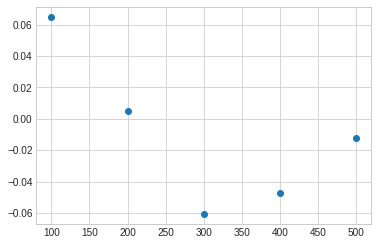

In [51]:
correlation_coeffs = list()
lens = list()
step = 10
mk_seq_len= 100
for i in range(5):
    gen = congruent_method_generator(a,m,x0)
    mk_values = [next(gen) for _  in range(mk_seq_len)]
    x = mk_values[:(-step)]
    y =mk_values[step:]
    correlation_coeffs.append(scipy.stats.pearsonr(x, y)[0])
    lens.append(mk_seq_len)
    mk_seq_len +=100

print(correlation_coeffs)
plt.plot(lens,correlation_coeffs,'o')
plt.show()
